In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DF
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# read the ride data file and store it in a pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get teh data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban, suburban, and rural cities.
print(sum(city_data_df['type']=='Urban'))
print(sum(city_data_df['type']=='Suburban'))
sum(city_data_df['type']=='Rural')

66
36


18

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [13]:
# combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city', 'city'])

# Display the DF
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [14]:
# Create the Urban city DF
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [15]:
# Creat teh suburban and rural city DFs
suburban_cities_df = pyber_data_df[pyber_data_df['type']== 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4.018030e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [16]:
# get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [18]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get average fare for each city in the sub and rural cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [20]:
# get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [21]:
# Get the average number of drivers for each city for the suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

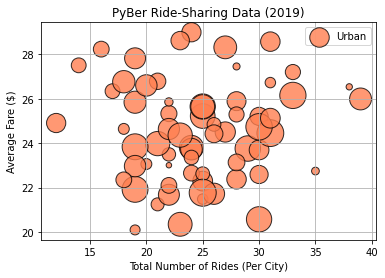

In [25]:
#build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=urban_driver_count*10,
           color='coral',
           edgecolors='black', linewidths=1,
           alpha=.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#add the legend
plt.legend()

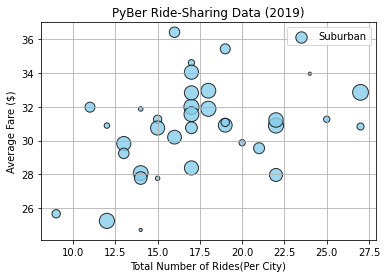

In [26]:
#build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, c='skyblue',
           edgecolors='black', linewidths=1,
           alpha=.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
# add the legend
plt.legend()

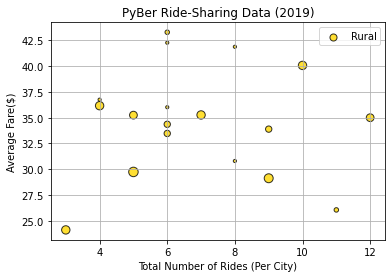

In [27]:
# build the scatter plots for rural cities
plt.scatter(rural_ride_count, 
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolors='black', linewidths=1,
           alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# add the legend
plt.legend()

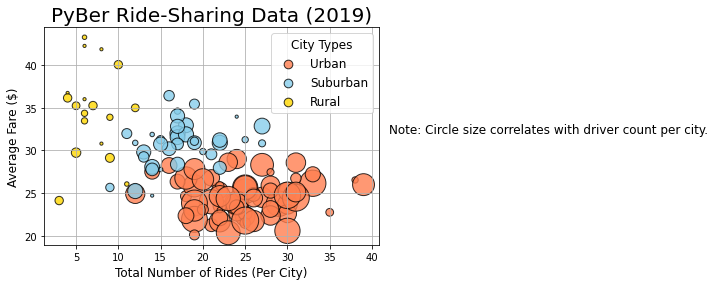

In [34]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Create a legend 
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# incorporate a text label about circle size
plt.text(42, 32, "Note: Circle size correlates with driver count per city.", fontsize='12')
# save the figure
plt.savefig('analysis/Fig1.png',dpi=300, bbox_inches = "tight")
# Show the plot
plt.show()